# CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, MaxPool2D, AveragePooling2D, Flatten, Activation
from tensorflow.keras.models import Model, Sequential

tf.__version__

'2.3.0'

In [2]:
from tensorflow.keras.datasets import mnist
np.random.seed(101)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [5]:
# input shape 맞추기
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)

# 같은효과
# X_train.reshape(-1, 28, 28, 1)
# X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [6]:
X_train[0][6]  # 값 보면 소수로 바꿔주는게 좋음

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 30],
       [ 36],
       [ 94],
       [154],
       [170],
       [253],
       [253],
       [253],
       [253],
       [253],
       [225],
       [172],
       [253],
       [242],
       [195],
       [ 64],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [7]:
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
# onehot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

print(f'before: {y_train[0]}\nafter: {y_train_onehot[0]}')

before: 5
after: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# fit 과정에서 batch주고 shuffle해도 상관 없지만 메모리상의 이점을 위해서 한다고 생각하면 됨
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_onehot)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_onehot)).batch(128)

In [10]:
input = Input(shape=X_train.shape[1:])
x = Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu')(input)
x = AveragePooling2D((2, 2), strides=(2, 2), padding='valid')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu')(x)
x = AveragePooling2D((2, 2), strides=(2, 2), padding='valid')(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu')(x)
x = Flatten()(x)
x = Dense(16, activation = 'relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 288)              

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds, shuffle=True)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3713 - accuracy: 0.8862 - val_loss: 0.1046 - val_accuracy: 0.9691
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1046 - accuracy: 0.9696 - val_loss: 0.0681 - val_accuracy: 0.9778
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0756 - accuracy: 0.9774 - val_loss: 0.0635 - val_accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.0449 - val_accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0411 - val_accuracy: 0.9868
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0434 - val_accuracy: 0.9862
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0434 - val_accuracy: 0.9861


In [12]:
model.evaluate(test_ds, verbose=0)

[0.04485509172081947, 0.9848999977111816]

In [13]:
# history.history 저장 값
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

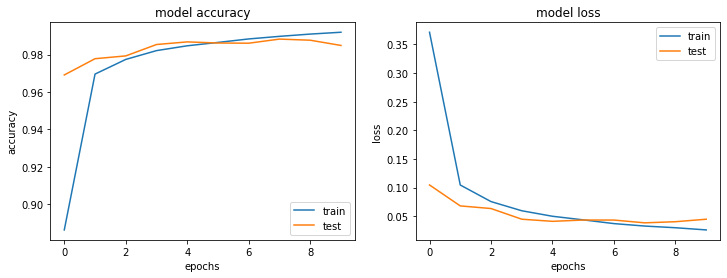

In [14]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train', 'test'])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend(['train', 'test'])

plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[ 975    0    0    0    0    0    1    1    3    0]
 [   1 1116    3    4    0    0    1    2    8    0]
 [   0    1 1022    1    0    0    0    4    4    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   1    0    1    0  954    0    4    1    3   18]
 [   1    0    0    8    0  882    1    0    0    0]
 [   4    2    1    0    1    9  936    0    5    0]
 [   0    1    5    6    0    0    0  996    3   17]
 [   0    0    1    4    0    2    0    0  964    3]
 [   0    0    0    1    3    3    0    0    4  998]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test Accuracy : 0.9849


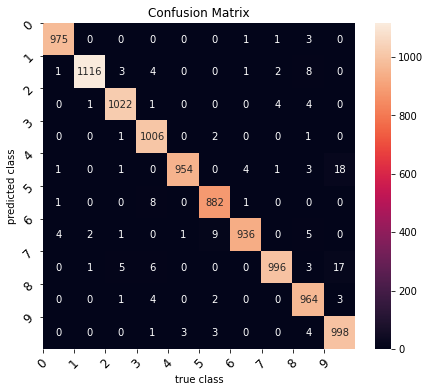

In [17]:
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))
plt.show()

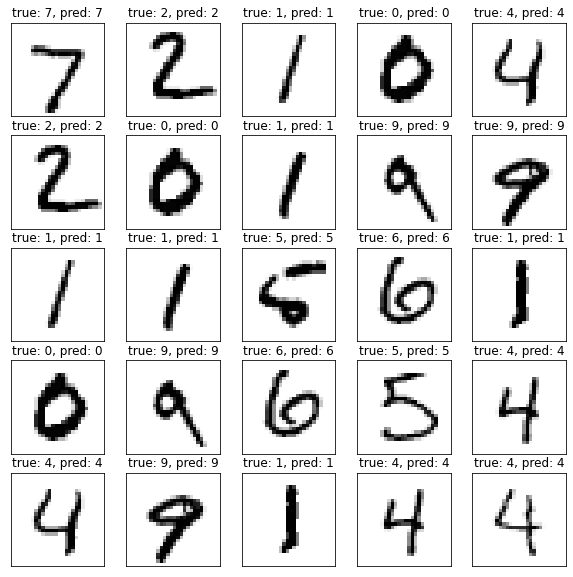

In [18]:
fig, ax = plt.subplots(5, 5)

fig.set_size_inches(10, 10)

for r in range(5):
  for c in range(5):
    tmp = (r+1)*(c+1)-1
    ax[r, c].set_title('true: {}, pred: {}'.format(y_test[tmp], y_pred[tmp]))
    ax[r, c].imshow(X_test[tmp].reshape(28, 28), cmap = plt.cm.binary)
    ax[r, c].set_xticks([])
    ax[r, c].set_yticks([])

plt.show()

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_onehot)).shuffle(10000).batch(128)\
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_onehot)).batch(128)\
이거 뭐하는건지\
- fit과정에서 batch와 shuffle을 줘도 상관 없지만 메모리의 효율을 위해 사용한다고 생각

kernel_size = 5 해도 되는지 (5, 5) 안해도 되는건지\
- 같은 의미임

onehot 안하고 sparse_categorical_crossentropy\
vs\
onehot하고 categorical_crossentropy\
- sparse_categorical_crossentropy를 쓰는 것이 메모리적인 측면에서 더 좋다

activation을 argument로 주는거랑 레이어 따로 쌓는거랑 기능이 다른지\
- 완전히 같은 기능

에폭 돌때 옆에 나오는 숫자 469 뭔지\
- int(X_train.shape[0]/batch_size)와 같음

predict_classes안되는건 시퀀셜안써서 그런가\
- 그런듯. 그냥 np.argmax(y_pred, axis=1) 사용할 것